In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
import pprint
import csv
import pickle
import multiprocessing
from mint_general_interpolation_grid_builder.functions_natalie.custom_mpl_settings import (
    load_mpl_rc,
)
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()

from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.MS_table_builder import MainSequenceTableBuilder
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.GB_table_builder import RedGiantBranchTableBuilder
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.CHeB_table_builder import (
    CoreHeliumBurningTableBuilder,
)
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.EAGB_table_builder import (
    EarlyAsymptoticGiantBranchTableBuilder,
)
from mint_general_interpolation_grid_builder.MINT.config.table_columns import table_columns


evol_phase = 'GB'

settings = {
    **table_columns,
    'grid_directory':f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}',
    'metallicity':0.02,
    'num_processes':4
}

if evol_phase == 'MS':
    tester = MainSequenceTableBuilder(settings=settings)
elif evol_phase == 'GB':
    tester = RedGiantBranchTableBuilder(settings=settings)
elif evol_phase == 'CHeB':
    tester = CoreHeliumBurningTableBuilder(settings=settings)
elif evol_phase == 'EAGB':
    tester = EarlyAsymptoticGiantBranchTableBuilder(settings=settings)


Building a grid with (X_0, Y_0, Z_0)=(0.7, 0.28, 0.02)


Building a grid with (X_0, Y_0, Z_0)=(0.7, 0.28, 0.02)


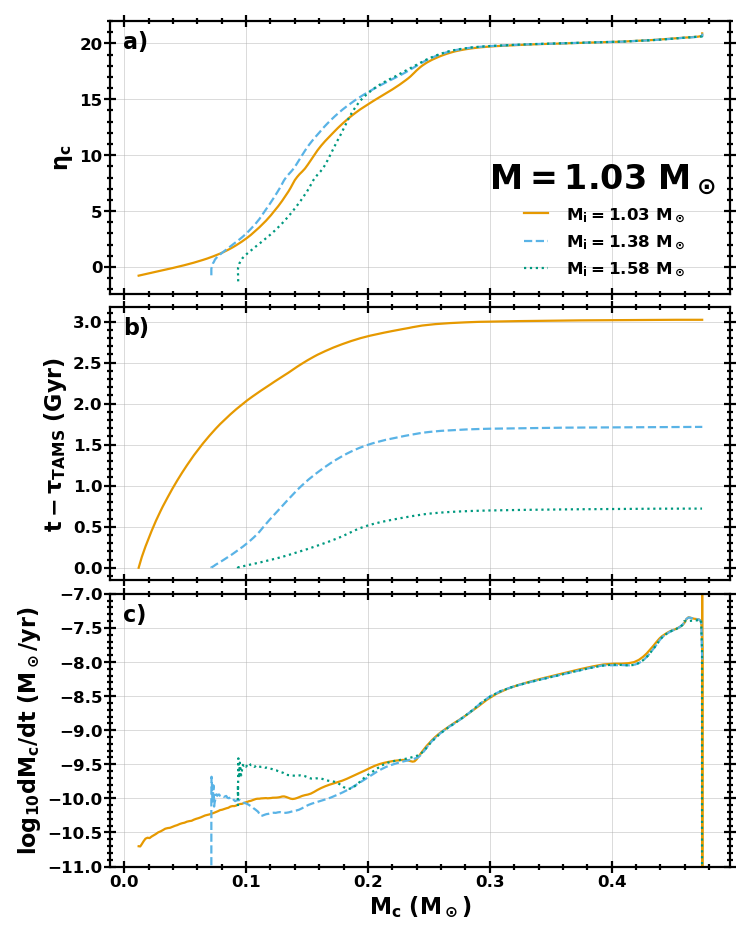

In [31]:
# MODELS POST RADIATIVE CORE HYDROGEN BURNING

evol_phase = 'GB'
tester = RedGiantBranchTableBuilder(settings=settings)

df = tester.load_table(evol_phase)
df['HELIUM_CORE_MASS']= df['HELIUM_CORE_MASS_FRACTION']*df['MASS']
df['LOG_LUMINOSITY'] = np.log10(df['LUMINOSITY'])
df_mass = df[df["MASS"]==1.03]

fig,ax = plt.subplots(3,1,figsize=(10,14),sharex=True)

for Mi in [1.03,1.38,1.58]:
    track = df_mass[df_mass['INITIAL_MASS']==Mi]
    ax[0].plot(track['HELIUM_CORE_MASS'],track['CENTRAL_DEGENERACY'],label=r'$M_\mathrm{i} = $'+f'{Mi}'+'$~\mathrm{M}_\odot$')
    ax[1].plot(track['HELIUM_CORE_MASS'],(track['AGE']/1e9))
    ax[2].plot(track['HELIUM_CORE_MASS'],np.log10(track['MASS']*track['FIRST_DERIVATIVE_HELIUM_CORE_MASS_FRACTION']))

ax[0].legend(title=r'$M = 1.03~\mathrm{M}_\odot$')

ax[2].set(xlabel='$M_\mathrm{c}~(\mathrm{M}_\odot)$')
ax[1].set(ylabel=r'$t-\tau_\mathrm{TAMS}~(\mathrm{Gyr})$')
ax[2].set(ylabel=r'$\log_{10} dM_\mathrm{c}/dt~(\mathrm{M}_\odot/\mathrm{yr})$')
ax[0].set(ylabel=r'$\eta_\mathrm{c}$')

# ax[1].set_ylim(-10,-4)
ax[2].set_ylim(-11,-7)

ax[0].text(0.02,0.9,'a)',transform=ax[0].transAxes)
ax[1].text(0.02,0.9,'b)',transform=ax[1].transAxes)
ax[2].text(0.02,0.9,'c)',transform=ax[2].transAxes)
# plt.subplots_adjust(hspace=0)

plt.savefig(f'plots/ImpactRadiativeHydrogenBurning.jpeg',dpi=200)

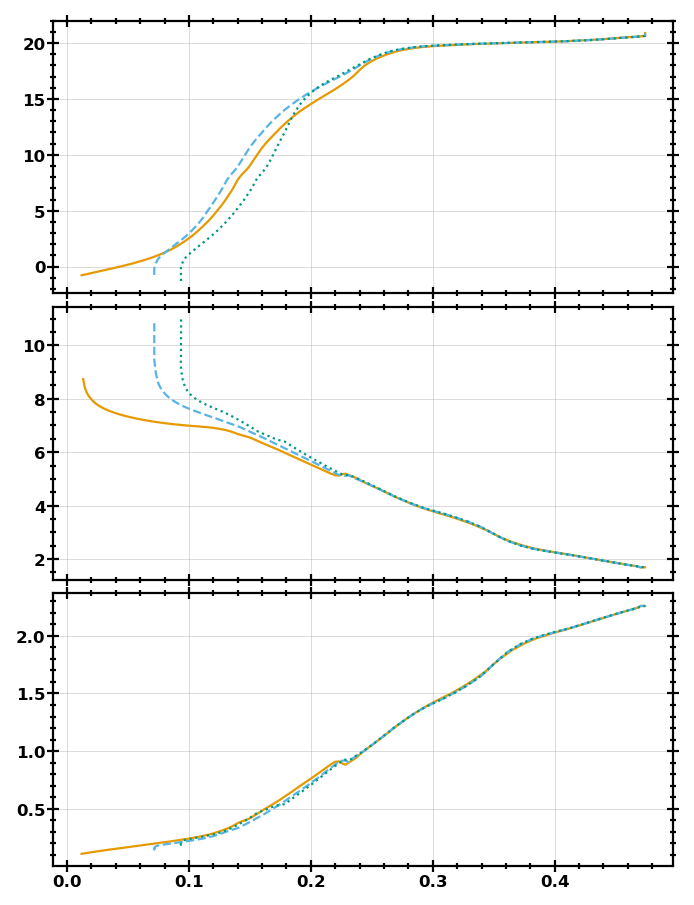

In [11]:
fig,ax = plt.subplots(3,1,figsize=(10,14),sharex=True)

for Mi in [1.03,1.38,1.58]:
    track = df_mass[df_mass['INITIAL_MASS']==Mi]
    ax[0].plot(track['HELIUM_CORE_MASS'],track['CENTRAL_DEGENERACY'],label=r'$M_\mathrm{i} = $'+f'{Mi}'+'$~\mathrm{M}_\odot$')
    ax[1].plot(track['HELIUM_CORE_MASS'],np.log10(track['TIMESCALE_KELVIN_HELMHOLTZ']/track['AGE']))
    ax[2].plot(track['HELIUM_CORE_MASS'],np.log10(track['RADIUS']))



In [13]:
1.3/0.6

2.166666666666667